<a href="https://colab.research.google.com/github/Ramkanc/Hackathon2/blob/test/RamV3G_U3_MH2_Plant_Images_Denoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Problem Statement

Denoise the leaf images using deep learning techniques

## Learning Objectives

At the end of the Mini Hackathon, you will be able to :
* Denoise healthy/diseased leaf images using Autoencoder
* Visualize the denoised images

In [ ]:
#@title Mini Hackathon Walkthrough Video
from IPython.display import HTML

HTML("""<video width="720" height="420" controls>
  <source src="https://cdn.talentsprint.com/talentsprint1/archives/sc/misc/M3_Mini_Hackathon1_Plant_Images_Denoising.mp4" type="video/mp4">
</video>
""")

## Background

Crop losses due to diseases are a major threat to food security every year, across countries.  Conventionally, plant diseases were detected through a visual examination of the affected plants by plant pathology experts. This was often possible only after major damage had already occurred, so treatments were of limited or no use. Recently, access to smartphone based image capturing has highly increased amongst farmers and agriculturists. This has led to the successful adoption of plant disease diagnostic applications based on deep learning techniques. This is of immense value in the field of agriculture and an excellent tool for faster identification and treatment of crop diseases. It holds key importance in preventing crop based food and economic losses.
## Dataset and Methodology

The dataset for this Mini-Hackathon is derived from the 'Plant Village' Dataset.Around 4500 images of healthy and diseased leaves and their labels have been taken from the 'Plant Village' Dataset. The 4500 images consist of 5 different classes - Bell Pepper Healthy, Bell Pepper Bacterial Spot, Potato Healthy, Potato Early Blight and Potato Late Blight. The original pictures have been clicked in a well controlled environment with very less noise in the images. This is not how real world data may look like.  So we have added noise to the original images to form a noisy dataset. We can use deep learning techniques such as an autoencoder for obtaining denoised images.


## References:

[Plant Village Dataset Description](https://drive.google.com/file/d/1xGhK-KhhE8W_lfr3l6KT_9K8prHDRb9_/view?usp=sharing)


[Deep Learning for Plant Disease Detection](https://drive.google.com/file/d/1V7NgFs-YGG3G-pz3OJf2X-KQxOGRZzRu/view?usp=sharing)

[Autoencoder motivational Expt](https://colab.research.google.com/drive/1gkxGlPQ5F3PtugI_zKMeFl3fYVOmscxk?authuser=1#scrollTo=Yv3ZC8aOKJqL)


## Grading = 10 Marks

## Setup Steps

In [1]:
#@title Run this cell to download the dataset

from IPython import get_ipython
ipython = get_ipython()

notebook="M3_Mini_Hackathon1_Plant_Images_Denoising" #name of the notebook
Answer = "This notebook is graded by mentors on the day of hackathon"
def setup():
   ipython.magic("sx wget https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/PlantVillage_Noisy_Dataset.zip")
   ipython.magic("sx unzip -qq PlantVillage_Noisy_Dataset.zip")
   print ("Setup completed successfully")
   return

setup()

Setup completed successfully


**Import Libraries**

In [2]:
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from torch.autograd import Variable
from torchsummary import summary
from torchvision.utils import save_image

from PIL import Image
import numpy as np
import os

## **Stage 1:** Data Preparation

### 1 Marks - > Prepare the dataset

1. Define transformations:
   * Transform image size to 128 by using Resize()
   * Transform the image into a number using tensor
2. Load the dataset with the defined transformations.

In [3]:
# YOUR CODE HERE for the transforming the dataset
image_size = (128, 128)
transformations = transforms.Compose([transforms.Resize(image_size),
                                transforms.ToTensor()])
                                #transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
                                #transforms.Normalize(mean=[0.5], std=[0.2])])

In [4]:
#torch.manual_seed(42)

In [5]:
# YOUR CODE HERE for preparing trainloader and testloader set
batch_size = 32
train_set = datasets.ImageFolder('/content/PlantVillage/Noisy_Dataset/Train_Data', transform=transformations)
trainloader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)

In [6]:
print(train_set.class_to_idx)
print(len(train_set))

{'Pepper__bell___Bacterial_spot': 0, 'Pepper__bell___healthy': 1, 'Potato___Early_blight': 2, 'Potato___Late_blight': 3, 'Potato___healthy': 4}
3007


## **Stage 2:** Build and Train the Model



### 2 Marks -> Write the encoder and decoder layers in one class

* Define the Autoencoder neural network
    *  First define the layers required in the  __init__ function.
    *  Build the neural network in the forward() function.

[Hint for saving the images](https://debuggercafe.com/implementing-deep-autoencoder-in-pytorch/)

In [7]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

cuda


In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [9]:
# Below Architecture provides .01 error
# class Autoencoder(nn.Module):
#     def __init__(self):
#         super(Autoencoder, self).__init__()

#         # Encoder with one fewer layer
#         self.encoder = nn.Sequential(
#             nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1),   # (3, 128, 128) -> (32, 64, 64)
#             nn.BatchNorm2d(32),
#             nn.ReLU(),
#             nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1),  # (32, 64, 64) -> (64, 32, 32)
#             nn.BatchNorm2d(64),
#             nn.ReLU()
#             #nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1), # (64, 32, 32) -> (128, 16, 16)
#             #nn.BatchNorm2d(128),
#             #nn.ReLU()
#         )

#         # Flatten layer
#         self.flatten = nn.Flatten()

#         # Latent space (fully connected layer)
#         self.fc1 = nn.Linear(64 * 128 * 128, 16)  # Adjusted flattened size

#         # Fully connected layer to reconstruct dimensions before decoding
#         self.fc2 = nn.Linear(16, 64 * 128 * 128)

#         # Decoder with one fewer layer
#         self.decoder = nn.Sequential(
#             #nn.ConvTranspose2d(in_channels=128, out_channels=64, kernel_size=3, stride=1, padding=1 ),  # (128, 16, 16) -> (64, 32, 32)
#             #nn.BatchNorm2d(64),
#             #nn.ReLU(),
#             nn.ConvTranspose2d(in_channels=64, out_channels=32, kernel_size=3, stride=1, padding=1),   # (64, 32, 32) -> (32, 64, 64)
#             nn.BatchNorm2d(32),
#             nn.ReLU(),
#             nn.ConvTranspose2d(in_channels=32, out_channels=3, kernel_size=3, stride=1, padding=1 ),    # (32, 64, 64) -> (3, 128, 128)
#             #nn.Tanh()  # Assuming input range is normalized to [-1, 1]
#             nn.BatchNorm2d(3),
#             nn.Sigmoid()
#         )

#     def forward(self, x):
#         # Encode
#         x = self.encoder(x)
#         x = self.flatten(x)  # Flatten the output of the encoder
#         #print("Shape of flattened output:", x.shape)  # Print the shape of the flattened output
#         x = self.fc1(x)  # Fully connected layer to latent space
#         x = self.fc2(x)  # Fully connected layer to reshape for decoder
#         x = x.view(x.size(0), 64, 128, 128)  # Reshape to the appropriate dimensions for the decoder

#         # Decode
#         x = self.decoder(x)
#         return x

In [10]:
#Below code is giving loss less than .003
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()

        # Encoder with one fewer layer
        self.encoder = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1),   # (3, 128, 128) -> (32, 64, 64)
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1),  # (32, 64, 64) -> (64, 32, 32)
            nn.BatchNorm2d(64),
            nn.ReLU()

        )

        # Flatten layer
        self.flatten = nn.Flatten()

        # Latent space (fully connected layer)
        #self.fc1 = nn.Linear(64 * 128 * 128, 16)  # Adjusted flattened size

        # Fully connected layer to reconstruct dimensions before decoding
        #self.fc2 = nn.Linear(16, 64 * 128 * 128)

        # Decoder with one fewer layer
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(in_channels=64, out_channels=32, kernel_size=3, stride=1, padding=1),   # (64, 32, 32) -> (32, 64, 64)
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.ConvTranspose2d(in_channels=32, out_channels=3, kernel_size=3, stride=1, padding=1 ),    # (32, 64, 64) -> (3, 128, 128)
            #nn.Tanh(),  # Assuming input range is normalized to [-1, 1]
            nn.BatchNorm2d(3),
            nn.Sigmoid()
        )

    def forward(self, x):
        # Encode
        x = self.encoder(x)
        x = self.flatten(x)  # Flatten the output of the encoder
        #print("Shape of flattened output:", x.shape)  # Print the shape of the flattened output
        #x = self.fc1(x)  # Fully connected layer to latent space
        #x = self.fc2(x)  # Fully connected layer to reshape for decoder
        x = x.view(x.size(0), 64, 128, 128)  # Reshape to the appropriate dimensions for the decoder

        # Decode
        x = self.decoder(x)
        return x

In [11]:

model = Autoencoder().to(device)
summary(model,(3,128,128))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 128, 128]             896
       BatchNorm2d-2         [-1, 32, 128, 128]              64
              ReLU-3         [-1, 32, 128, 128]               0
            Conv2d-4         [-1, 64, 128, 128]          18,496
       BatchNorm2d-5         [-1, 64, 128, 128]             128
              ReLU-6         [-1, 64, 128, 128]               0
           Flatten-7              [-1, 1048576]               0
   ConvTranspose2d-8         [-1, 32, 128, 128]          18,464
       BatchNorm2d-9         [-1, 32, 128, 128]              64
             ReLU-10         [-1, 32, 128, 128]               0
  ConvTranspose2d-11          [-1, 3, 128, 128]             867
      BatchNorm2d-12          [-1, 3, 128, 128]               6
          Sigmoid-13          [-1, 3, 128, 128]               0
Total params: 38,985
Trainable params: 

### 2 Marks -> Train the Model and calculate the loss for dataset for each epoch.

1. Declare the loss function and optimizer
2. Create a directory for saving the output images.
2. Train the model
   *  Extract the image features only as we do not take the labels to train the autoencoder network.
   * Calculate the loss.
   * Append the loss values after every epoch and print them.
   * Save the output (denoised) images in a directory.

In [12]:
# YOUR CODE HERE for declaring the loss function and optimizer


# Initialization of Mean Square Error
loss_func = nn.MSELoss()
#loss_func = nn.CrossEntropyLoss()

# Initialization of Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.002)

In [13]:
# YOUR CODE HERE for defining a function for creating the directory
output_dir = 'denoised_images'
os.makedirs(output_dir, exist_ok=True)

In [14]:
# YOUR CODE HERE.

# Train the model and print the loss at each epoch. Also save the output (denoised) images in a directory.
# Train the model and print the loss at each epoch. Also save the output (denoised) images in a directory.

num_epochs = 20  # Number of training epochs

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader):
        # Get the input images
        inputs, _ = data

        inputs = inputs.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Compute the loss
        loss = loss_func(outputs, inputs)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()

    average_loss = running_loss / len(trainloader)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {average_loss:.4f}")

    # Save the denoised images from the last batch of each epoch
    denoised_images = outputs.clamp(0, 1)  # Clamp the values to [0, 1] range for saving
    #save_image(denoised_images, os.path.join(output_dir, f'denoised_epoch_{epoch+1}.png'))
    for i in range(denoised_images.size(0)):
     save_image(denoised_images[i], os.path.join(output_dir, f'denoised_epoch_{epoch+1}_image_{i}.png'))
    if(average_loss<=0.002):
      break

print("Training completed.")


Epoch [1/20], Loss: 0.0042
Epoch [2/20], Loss: 0.0009
Training completed.


In [15]:
# YOUR CODE HERE

# Record loss of the train denoised images

In [16]:
train_loss = []
with torch.no_grad():
    for i, data in enumerate(trainloader):
        inputs, _ = data
        inputs = inputs.to(device)
        outputs = model(inputs)
        loss = loss_func(outputs, inputs)
        train_loss.append(loss.item())

# Print average training loss
print('Average Training Loss:', np.mean(train_loss))


Average Training Loss: 0.0006143607668568717


## **Stage 3:** Visualize the Denoised images

### 2 Marks -> Verify the denoised images and compare with original noisy images
1. Plot the original noisy images.
2. Plot denoised images which are saved in the directory.
3. Verify whether denoised images have less noise compared to original noisy images

**Hint:** If the noise is not reduced in the denoised images then revise the autoencoder architecture.

In [17]:
# YOUR CODE HERE for plotting and verifying the images (original noisy images and denoising images)

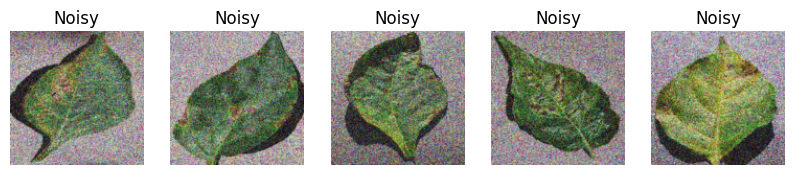

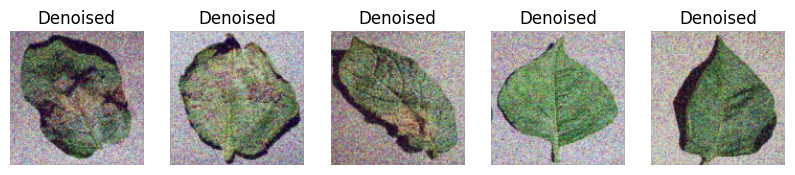

In [18]:

# Plot original noisy images
plt.figure(figsize=(10, 10))
for i in range(5):
    image, _ = train_set[i]
    plt.subplot(1, 5, i + 1)
    plt.imshow(image.permute(1, 2, 0))  # Permute dimensions for display
    plt.title('Noisy')
    plt.axis('off')
plt.show()

# Plot denoised images
denoised_images_path = 'denoised_images'
denoised_images_files = [f for f in os.listdir(denoised_images_path) if f.endswith('.png')]

plt.figure(figsize=(10, 10))
for i, file in enumerate(denoised_images_files[:5]):
    image = Image.open(os.path.join(denoised_images_path, file))
    plt.subplot(1, 5, i + 1)
    plt.imshow(image)
    plt.title('Denoised')
    plt.axis('off')
plt.show()


## **Stage 4:** Test the Model

### 2 Marks -> Evaluate model with the given test data

1. Extract only the images of test loader data as we do not use the labels for the autoencoder network
2. Pass the test images through the autoencoder model to get the denoised images of the test data.
3. Calculate the loss of the test images

In [19]:
output_test_dir = 'denoised_test_images'
os.makedirs(output_test_dir, exist_ok=True)

In [20]:
# 1) Extract only the images of test loader data as we do not use the labels for the autoencoder network
# 2) Pass the test images through the autoencoder model to get the denoised images of the test data and save them in '/content/denoised_test_images' folder.
# 3) Calculate the loss of the test images

import numpy as np
# Prepare test dataset and loader
test_set = datasets.ImageFolder('/content/PlantVillage/Noisy_Dataset/Test_Data', transform=transformations)
testloader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False)

# Evaluate on test data
test_loss = []
with torch.no_grad():
    for i, data in enumerate(testloader):
        inputs, _ = data
        inputs = inputs.to(device)
        outputs = model(inputs)
        loss = loss_func(outputs, inputs)
        test_loss.append(loss.item())

        # Save denoised test images
        denoised_images = outputs.clamp(0, 1)
        for j in range(denoised_images.size(0)):
            save_image(denoised_images[j], os.path.join(output_test_dir, f'denoised_test_image_{i * batch_size + j}.png'))

# Print average test loss
print('Average Test Loss:', np.mean(test_loss))


Average Test Loss: 0.0012116289421386433


In [21]:
# YOUR CODE HERE for recording the loss of the test dataset

### 1 Marks -> Visualizing and verifying test images with the original test noisy dataset

In [22]:
# YOUR CODE HERE for verification and visualization of the test denoised images and original test noisy images

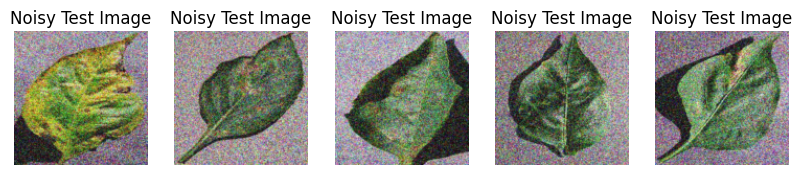

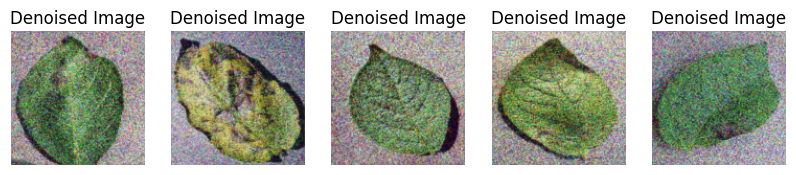

In [23]:
#  code for verification and visualization of the test denoised images and original test noisy images


# Plot original noisy test images
plt.figure(figsize=(10, 10))
for i in range(5):
    image, _ = test_set[i]
    plt.subplot(1, 5, i + 1)
    plt.imshow(image.permute(1, 2, 0))  # Permute dimensions for display
    plt.title('Noisy Test Image')
    plt.axis('off')
plt.show()

# Plot denoised test images (assuming you saved them during testing)
denoised_test_images_path = '/content/denoised_test_images'  # Adjust the path if needed
denoised_test_images_files = [f for f in os.listdir(denoised_test_images_path) if f.endswith('.png')]

plt.figure(figsize=(10, 10))
for i, file in enumerate(denoised_test_images_files[:5]):
    image = Image.open(os.path.join(denoised_test_images_path, file))
    plt.subplot(1, 5, i + 1)
    plt.imshow(image)
    plt.title('Denoised Image')
    plt.axis('off')
plt.show()
